In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [2]:
data = pd.read_csv('forestfires.csv')
data.sample(5)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
235,aug,sun,91.4,142.4,601.4,10.6,19.6,41,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
376,aug,mon,92.1,207.0,672.6,8.2,21.1,54,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
56,sep,tue,90.3,80.7,730.2,6.3,17.8,63,4.9,0.0,...,0,0,0,0,0,0,0,0,1,small
385,aug,sun,91.6,181.3,613.0,7.6,20.9,50,2.2,0.0,...,0,0,0,0,0,0,0,0,0,large
202,feb,sun,83.9,8.7,32.1,2.1,8.8,68,2.2,0.0,...,1,0,0,0,0,0,0,0,0,large


#### EDA & Data preprocessing

In [3]:
data.shape

(517, 31)

In [4]:
data.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [6]:
data.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
# Dropping columns which are not required
data = data.drop(['dayfri', 'daymon', 'daysat', 'daysun', 'daythu','daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 
                  'monthfeb','monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov','monthoct','monthsep'],axis = 1)
data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,small
...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small


In [8]:
# Checking if the data is balanced or imbalanced(how many datapoints are having small and large area)
data.size_category.value_counts()

small    378
large    139
Name: size_category, dtype: int64

<AxesSubplot:xlabel='size_category', ylabel='count'>

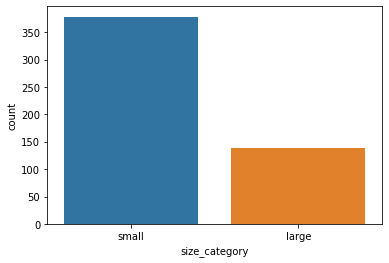

In [9]:
sns.countplot(x = 'size_category', data = data)

In [10]:
# Checking for which value of area is categorised into large and small by creating crosstab between area and size_category
pd.crosstab(data.area, data.size_category)

size_category,large,small
area,,
0.00,0,247
0.09,0,1
0.17,0,1
0.21,0,1
0.24,0,1
...,...,...
200.94,1,0
212.88,1,0
278.53,1,0


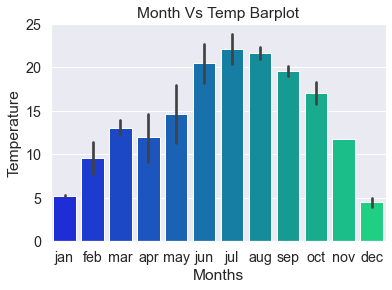

In [11]:
# Plotting Month Vs. temp plot

sns.set(style = "darkgrid", font_scale = 1.3)
month_temp = sns.barplot(x = 'month', y = 'temp', data = data,
                         order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], palette = 'winter');
month_temp.set(title = "Month Vs Temp Barplot", xlabel = "Months", ylabel = "Temperature");


Text(0.5, 1.0, 'HeatMap of Features for the Classes')

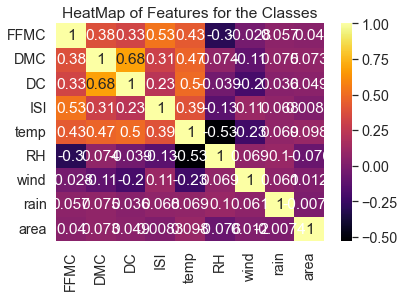

In [12]:
sns.heatmap(data.corr(), annot=True, cmap="inferno")
plt.gca().set_title("HeatMap of Features for the Classes")

In [13]:
# Encoding month and day features

data.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),
                           (1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
data.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7), inplace=True)
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,small
1,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,small
2,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,small
3,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,small
4,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,small


In [14]:
# Encoding target variable 'size category'

data.size_category.replace(('small', 'large'), (0, 1), inplace = True)
data.sample(5)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
497,8,2,96.1,181.1,671.2,14.3,32.3,27,2.2,0.0,14.68,1
79,8,2,91.0,121.2,561.6,7.0,21.6,19,6.7,0.0,0.00,0
72,3,5,91.7,33.3,77.5,9.0,15.6,25,6.3,0.0,0.00,0
339,9,1,91.6,108.4,764.0,6.2,20.4,41,1.8,0.0,1.47,0
275,12,4,84.6,26.4,352.0,2.0,5.1,61,4.9,0.0,5.38,0


In [15]:
data.corr()['size_category'].sort_values(ascending=False)


size_category    1.000000
area             0.311322
month            0.080316
wind             0.059113
rain             0.050001
DMC              0.034715
FFMC             0.022063
DC               0.019428
day              0.016796
temp             0.006021
ISI             -0.008726
RH              -0.045243
Name: size_category, dtype: float64

In [16]:
# Standardizing data
scaler=StandardScaler()
scaler.fit(data.drop('size_category',axis=1))

StandardScaler()

In [17]:
scaled_features=scaler.transform(data.drop('size_category',axis=1))
data_scaled=pd.DataFrame(scaled_features,columns=data.columns[:-1])
data_scaled

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,-1.968443,0.357721,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,-0.202020
1,1.110120,-1.090909,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,-0.202020
2,1.110120,0.840597,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,-0.202020
3,-1.968443,0.357721,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,-0.202020
4,-1.968443,1.323474,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,-0.202020
...,...,...,...,...,...,...,...,...,...,...,...
512,0.230531,1.323474,-1.640083,-0.846648,0.474768,-1.563460,1.536084,-0.753800,-0.736124,-0.073268,-0.100753
513,0.230531,1.323474,-1.640083,-0.846648,0.474768,-1.563460,0.519019,1.638592,0.995798,-0.073268,0.651674
514,0.230531,1.323474,-1.640083,-0.846648,0.474768,-1.563460,0.398350,1.577248,1.498614,-0.073268,-0.026532
515,0.230531,0.840597,0.680957,0.549003,0.269382,0.500176,1.156839,-0.140366,-0.009834,-0.073268,-0.202020


In [18]:
# Splitting data into training and testing data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data_scaled,data['size_category'],test_size=0.3, random_state=20)

In [19]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((361, 11), (156, 11), (361,), (156,))

#### Building SVM model

In [20]:
from sklearn import metrics

svc =  SVC()
svc.fit(x_train,y_train)
# make predictions
x_predict = svc.predict(x_test)
# summarize the fit of the model
print(metrics.classification_report(y_test, x_predict),"\n")

print(metrics.confusion_matrix(y_test, x_predict),"\n")

print("Accuracy:",metrics.accuracy_score(y_test, x_predict))
print("Precision:",metrics.precision_score(y_test, x_predict))
print("Recall:",metrics.recall_score(y_test, x_predict))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88       112
           1       1.00      0.27      0.43        44

    accuracy                           0.79       156
   macro avg       0.89      0.64      0.65       156
weighted avg       0.84      0.79      0.75       156
 

[[112   0]
 [ 32  12]] 

Accuracy: 0.7948717948717948
Precision: 1.0
Recall: 0.2727272727272727


### Building SVM model with Hyper Parameters

In [21]:
model = SVC(kernel='rbf',gamma=15, C=1)

model.fit(x_train, y_train)
# make predictions
prediction = model.predict(x_test)
# summarize the fit of the model
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

print("Accuracy:",metrics.accuracy_score(y_test, prediction))
print("Precision:",metrics.precision_score(y_test, prediction))
print("Recall:",metrics.recall_score(y_test, prediction))

              precision    recall  f1-score   support

           0       0.73      0.99      0.84       112
           1       0.67      0.05      0.09        44

    accuracy                           0.72       156
   macro avg       0.70      0.52      0.46       156
weighted avg       0.71      0.72      0.63       156

[[111   1]
 [ 42   2]]
Accuracy: 0.7243589743589743
Precision: 0.6666666666666666
Recall: 0.045454545454545456


### Building model with Grid Search CV

In [22]:
svc = SVC()
param_grid = [{'kernel':['linear', 'poly', 'rbf', 'sigmoid'], 'gamma':[50,5,10,0.5,0.1], 'C':[15,14,13,12,11,10,0.1,0.001]
              }]
gsv = GridSearchCV(svc,param_grid,cv = 5)
gsv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [15, 14, 13, 12, 11, 10, 0.1, 0.001],
                          'gamma': [50, 5, 10, 0.5, 0.1],
                          'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}])

In [23]:
gsv.best_params_,gsv.best_score_

({'C': 13, 'gamma': 50, 'kernel': 'linear'}, 0.969558599695586)

#### Building final SVM model with 'C': 13, 'gamma': 50, 'kernel': 'linear'

In [24]:
final_model = SVC(kernel='linear',gamma=50, C=13)
final_model.fit(x_train,y_train)
# make predictions
x_test_pred = final_model.predict(x_test)

# summarize the fit of the final_model
print(metrics.classification_report(y_test,x_test_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       112
           1       1.00      0.95      0.98        44

    accuracy                           0.99       156
   macro avg       0.99      0.98      0.98       156
weighted avg       0.99      0.99      0.99       156



#####  f1 score for this model is very high 98. so this is the best possible model we can build.